# Problem 1

## a)

$$ \Delta = C_{imp}(T_{old}) - C_{imp}(T_{new})$$  
$$  = \sum_{m=1}^{M}{N_mQ_m(T_{old})} - \sum_{m=1}^{M+1}{\tilde{N_m}\tilde{Q_m}(T_{new})}$$  
$$ = \sum_{m=1}^{M}{\sum_{i:x_i\in{R_m}}^{}{(y_i-\hat{y_m})^2}} - \sum_{m=1}^{M+1}{\sum_{i:x_i\in{\tilde{R_m}}}^{}{(y_i-\hat{\tilde{y_m}})^2}}$$  
Since the first M-1 regions are exactly the same in the old tree and the new tree, we are able to continue with our equation above in the following way:  
$$ = \sum_{i:x_i\in{R_M}}^{}{(y_i - \hat{y_M})^2} - \sum_{m=M}^{M+1}{\sum_{i:x_i\in{\tilde{R_m}}}^{}{(y_i-\hat{\tilde{y_m}})^2}}$$
Moreover according to the segmentation in the final bucket M, we have $R_M = \tilde{R_M}\cup{\tilde{R_{M+1}}}$, and  
$$\hat{y_M} = \frac{1}{N_M}\sum_{i:x_i\in{R_M}}^{}{y_i}$$
$$\hat{\tilde{y_m}} = \frac{1}{\tilde{N_m}}\sum_{i:x_i\in{\tilde{R_m}}}^{}{y_i}$$
Therefore we can conclude that $\Delta$ only depends on the data points that fall in region $R_M$ in the orginal tree $T_{old}$

## b)

We will start from the function of RSS  
$$RSS(z) = \sum_{i=1}^{n}{(z_i-z)^2}$$  
$$ \Delta = \sum_{i:x_i\in{R_M}}^{}{(y_i-\hat{y_M})^2} - \sum_{m=M}^{M+1}{\sum_{i:x_i\in{\tilde{R_m}}}^{}{(y_i-\hat{\tilde{y_m}})^2}}$$  
$$\Delta = \sum_{i:x_i\in{R_M}}^{}{(y_i-\hat{y_M})^2} - \sum_{i:x_i\in{\tilde{R_M}}}^{}{(y_i-\hat{\tilde{y_M}})^2}-\sum_{i:x_i\in{\tilde{R_{M+1}}}}^{}{(y_i-\hat{\tilde{y_{M+1}}})^2}$$  
Since $$R_M = \tilde{R_M} \cup {\tilde{R_{M+1}}}$$  
$$ R_M = \sum_{i:x_i\in{\tilde{R_M}}}^{}{(y_i-\hat{y_M})^2}+\sum_{i:x_i\in{\tilde{R_{M+1}}}}^{}{(y_i-\hat{y_M})^2}-\sum_{i:x_i\in{\tilde{R_M}}}^{}{(y_i-\hat{\tilde{y_M}})^2}-\sum_{i:x_i\in{\tilde{R_{M+1}}}}^{}{(y_i-\hat{\tilde{y_{M+1}}})^2}$$  
$$R_M = RSS_{y_i}(\hat{y_M}) - RSS_{y_i}(\hat{\tilde{y_M}})+RSS_{y_i}(\hat{y_{M+1}})-RSS_{y_i}(\hat{\tilde{y_{M+1}}})$$  
Note that we have $\hat{\tilde{y_M}} = \frac{1}{\tilde{N_M}}\sum_{i:x_i\in{\tilde{R_M}}}^{}{y_i}$ and $\hat{\tilde{y_{M+1}}} = \frac{1}{\tilde{N_{M+1}}}\sum_{i:x_i\in{\tilde{R_{M+1}}}}^{}{y_i}$, moreover, we may conclude from the hint that they are actually the minimizer of $RSS_{y_i}(z)$ where $i:x_i\in{\tilde{R_M}}$ and $RSS_{y_i}(z)$ where $i:x_i\in{\tilde{R_{M+1}}}$  
Hence $RSS_{y_i}(\hat{y_M}) - RSS_{y_i}(\hat{\tilde{y_M}}) \geq{0}$ where $i:x_i\in{\tilde{R_M}}$  
And $RSS_{y_i}(\hat{y_{M+1}}) - RSS_{y_i}(\hat{\tilde{y_{M+1}}}) \geq{0}$ where $i:x_i\in{\tilde{R_{M+1}}}$  
Such that we have $\Delta \geq{0}$

## c)

$$ C_{\alpha}(T_{new}) - C_{\alpha}(T_{old}) \leq {0}$$  
$$ \Leftrightarrow C_{imp}(T_{new}) - C_{imp}(T_{old}) + {\alpha}SST \leq{0}$$  
$$ \Leftrightarrow -\Delta + {\alpha}SST \leq {0}$$
And from the previous question we have the representation of $\Delta$, after plug in we will have  
$$ \Leftrightarrow \sum_{m=1}^{M}{\sum_{i:x_i\in{R_M}}^{}{(y_i-\hat{y_m})^2}} - \sum_{m=1}^{M+1}{\sum_{i:x_i\in{\tilde{R_m}}}^{}{(y_i-\hat{\tilde{y_m}})^2}} \geq{\alpha}SST$$  
by the definition of SSE, we will have. 
$$ \Leftrightarrow SSE_{old} - SSE_{new} \geq{\alpha}SST$$
$$ \Leftrightarrow \frac{SSE_{old}}{SST} - \frac{SSE_{new}}{SST} \geq{\alpha}$$. 
$$ \Leftrightarrow R_{new}^{2} - R_{old}^{2} \geq{\alpha}$$

# Problem 2

## a)

From my point of view, I think treating (Missing) as an explicit category is reasonable.  
Firstly, each attribute feature with Missing values in the provided dataset is of categorical form, as a result of which treating them as explicit catefory is operational.  
Secondly, we may observe that the missing rate shown in the table 1. They are all above 30%, some of them are even 80%. Therefore it is inaccurate to use several approaches for dealing with missing values in machine learning.

## b)

### i)

In [1]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('yelp242_train.csv')

# Below is the code for building a linear regression model
import statsmodels.formula.api as smf

linear_model = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)")) + C(ByAppointmentOnly, Treatment(reference="(Missing)")) + C(WheelechairAccessible, Treatment(reference="(Missing)"))+C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))',
                 data=data_train).fit()

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          2.45e-235
Time:                        15:55:24   Log-Likelihood:                -7220.7
No. Observations:                6272   AIC:                         1.449e+04
Df Residuals:                    6246   BIC:                         1.467e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### ii)

In [2]:
# First we get the data
y_train = data_train['stars']
x_train = pd.get_dummies(data_train.drop(['stars'],axis=1))

# We need to drop the missing columns produced by dummy variables
origin_column = list(x_train.columns)
new_columns = []
for col in origin_column:
    if col.find('Missing') == -1:
        new_columns.append(col)
x_train = x_train[new_columns]

# Below is the code for building a decision tree regression model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha':np.linspace(0.0,0.005,50)}

dtr = DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=20,random_state=88)
dtr_cv = GridSearchCV(dtr,param_grid=grid_values, scoring = 'r2',cv=5,verbose=0)
dtr_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.        , 0.00010204, 0.00020408, 0.00030612, 0.00040816,
       0.0005102 , 0.00061224, 0.00071429, 0.00081633, 0.00091837,
       0.00102041, 0.00112245, 0.00122449, 0.00132653, 0.00142857,
       0.00153061, 0.00163265, 0.00173469, 0.00183673, 0.00193878,
       0.00204082, 0.00214286, 0.0022449 , 0.00234694, 0.00244898,
       0.00255102, 0.00265306, 0.0027551 , 0.00285714, 0.00295918,
       0.00306122, 0.00316327, 0.00326531, 0.00336735, 0.00346939,
       0.00357143, 0.00367347, 0.00377551, 0.00387755, 0.00397959,
       0.00408163, 0.00418367, 0.00428571, 0.00438776, 0.0044898 ,
       0.00459184, 0.00469388, 0.00479592, 0.00489796, 0.005     ])},
             scoring='r2')

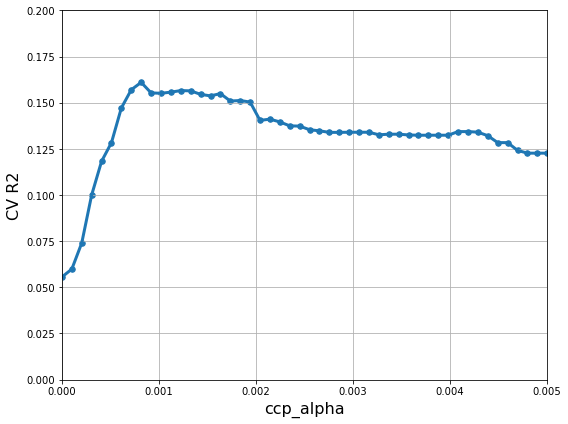

In [3]:
# We visualize the relationship between ccp_alpha and CV R2 value
import matplotlib.pyplot as plt
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.005])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.show()

In [4]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0008163265306122449}


We are required to do the cross-validation to figure out the best ccp_alpha value for the model to obtain the highest R2 value. We define the grid_values by taking steps values of ccp_alpha from 0 to 0.005, and apply it into the GridSearchCV model. With the help of matplotlib, we may notice that when ccp_value = 0.000816, the r2 scores highest graphically. Then we may get this point by using best_params to figure out the value of ccp_alpha.

### iii)

In [5]:
# Get x_test and y_test from the test dataset
data_test = pd.read_csv('yelp242_test.csv')
y_test = data_test['stars']
x_test = pd.get_dummies(data_test.drop(['stars'],axis=1))

origin_test_column = list(x_test.columns)
new_test_columns = []
for col in origin_test_column:
    if col.find('Missing') == -1:
        new_test_columns.append(col)
x_test = x_test[new_test_columns]

# Get the prediction for both models
linear_x_test = data_test.drop(['stars'],axis=1)
linear_y_pred = linear_model.predict(linear_x_test)
dtr_cv_pred = dtr_cv.predict(x_test)

#Compute OSR2 and MAE values for both models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# For linear regression model
comparison_data = {'Linear Regression': ['{:.3f}'.format(r2_score(y_test, linear_y_pred)),
                                         '{:.3f}'.format(mean_absolute_error(y_test, linear_y_pred))],
                   'Decision Tree Regressor': ['{:.3f}'.format(r2_score(y_test, dtr_cv_pred)),
                                               '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv_pred))]}
comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2','MAE'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Linear Regression,Decision Tree Regressor
OSR2,0.153,0.192
MAE,0.640,0.620


To sum up, Decision Tree Regressor model did better than Linear Regressor model. It has lower mean absolute error and gains higher OSR2 value, indicating a more suitable model.

## c)

In [6]:
data_train['fourOrAbove'] = data_train.apply(lambda x: 1 if x.stars >= 4 else 0, axis =1)
data_test['fourOrAbove'] = data_test.apply(lambda x:1 if x.stars >= 4 else 0, axis =1)

## d)

### i)

I don't think it is reasonable to weigh false positive and false positive equally, which will lead to the maximum of error rate when p = 0.5 as shown in the lecture slides.

### ii)

In [7]:
linear_x_train = data_train.drop(['stars','fourOrAbove'],axis=1)
linear_y_train_pred = linear_model.predict(linear_x_train)
data_train['linear_pred'] = linear_y_train_pred
data_train['linear_class'] = data_train.apply(lambda x: 1 if x.linear_pred >=4 else 0, axis =1 )

dtr_y_train_pred = dtr_cv.predict(x_train)
data_train['dtr_pred'] = dtr_y_train_pred
data_train['dtr_class'] = data_train.apply(lambda x:1 if x.dtr_pred >= 4 else 0, axis = 1)
data_train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove,linear_pred,linear_class,dtr_pred,dtr_class
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE,1,3.626468,0,3.726214,0
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),0,3.194956,0,2.995918,0
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),1,3.476947,0,3.135266,0
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE,1,3.794694,0,3.557034,0
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing),0,3.446997,0,3.439358,0


In [30]:
print(data_train['fourOrAbove'].sum())
print(data_train['linear_class'].sum())
print(data_train['dtr_class'].sum())

2764
699
891


### iii)

In [8]:
# Below is the code for building a logistic regression model
import statsmodels.formula.api as smf

logreg_model = smf.logit(formula='fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)")) + C(ByAppointmentOnly, Treatment(reference="(Missing)")) + C(WheelechairAccessible, Treatment(reference="(Missing)"))+C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))',
                 data=data_train).fit()

print(linear_model.summary())

Optimization terminated successfully.
         Current function value: 0.604809
         Iterations 6
                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          2.45e-235
Time:                        15:55:50   Log-Likelihood:                -7220.7
No. Observations:                6272   AIC:                         1.449e+04
Df Residuals:                    6246   BIC:                         1.467e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t   

### iv)

In [9]:
# Below is the code for building a decision tree classification model
dtc_y_train = data_train['fourOrAbove']
dtc_x_train = x_train

#Exhaustive search over specified parameter values for an estimator.

from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(dtc_x_train, dtc_y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='acc

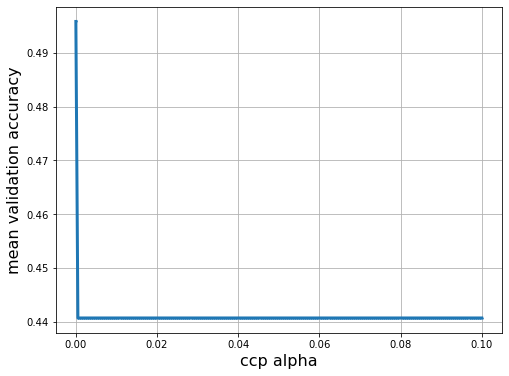

In [10]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()


In [11]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.4958553012525524


We are required to do the cross-validation to figure out the best ccp_alpha value for the model to obtain the highest accuracy value. We define the grid_values by taking steps values of ccp_alpha from 0 to 0.01, and apply it into the GridSearchCV model. With the help of matplotlib, we may notice that when ccp_value = 0.0, the accuracy scores highest graphically. Then we may get this point by using best_params to figure out the value of ccp_alpha.

### v)

In [12]:
y_test = data_test['fourOrAbove']
x_test = data_test.drop(['stars','fourOrAbove'],axis=1)

# Baseline model
data_test['base_pred'] = 0 # Because 0 is the most frequent outcome in fourOrAbove as data_test['fourOrAbove'].mean() < 0.5

# Linear regression model
linear_x_test = x_test
linear_y_test_pred = linear_model.predict(linear_x_test)
data_test['linear_pred'] = linear_y_test_pred
data_test['linear_class'] = data_test.apply(lambda x: 1 if x.linear_pred >= 4 else 0, axis = 1)

#Decision Tree Regression model
dtr_x_test = pd.get_dummies(x_test)

origin_dtr_test_columns = list(dtr_x_test.columns)
new_dtr_test_columns = []
for col in origin_dtr_test_columns:
    if col.find('Missing') == -1:
        new_dtr_test_columns.append(col)
dtr_x_test = dtr_x_test[new_dtr_test_columns]

dtr_y_test_pred = dtr_cv.predict(dtr_x_test)
data_test['dtr_pred'] = dtr_y_test_pred
data_test['dtr_class'] = data_test.apply(lambda x: 1 if x.dtr_pred >= 4 else 0, axis = 1)

#Decision Tree Classification Tree
dtc_x_test = dtr_x_test

dtc_y_pred = dtc_cv_acc.predict(dtc_x_test)
data_test['dtc_class'] = dtc_y_pred

In [13]:
data_test.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove,base_pred,linear_pred,linear_class,dtr_pred,dtr_class,dtc_class
0,4.0,34,(Missing),'full_bar',TRUE,'free',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE,1,0,4.327517,1,4.114148,1,1
1,4.0,802,TRUE,(Missing),TRUE,'free',FALSE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE,1,0,3.751397,0,3.726214,0,0
2,4.0,231,TRUE,'full_bar',TRUE,'free',FALSE,FALSE,(Missing),FALSE,TRUE,FALSE,TRUE,1,0,3.859013,0,3.726214,0,1
3,2.0,27,TRUE,'none',TRUE,'free',TRUE,(Missing),TRUE,FALSE,FALSE,FALSE,TRUE,0,0,3.867169,0,3.611111,0,1
4,3.5,6,(Missing),'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing),0,0,3.374662,0,3.236181,0,1


In [31]:
print(data_test['fourOrAbove'].sum())
print(data_test['linear_class'].sum())
print(data_test['dtr_class'].sum())

1190
271
336


In [17]:
base_pred = data_test['base_pred']
linear_pred = data_test['linear_class']
dtr_pred = data_test['dtr_class']
dtc_pred = data_test['dtc_class']

from sklearn.metrics import confusion_matrix

cm_base = confusion_matrix(y_test, base_pred)
cm_linear = confusion_matrix(y_test,linear_pred)
cm_dtr = confusion_matrix(y_test,dtr_pred)
cm_dtc = confusion_matrix(y_test,dtc_pred)

In [23]:
# Accuracy
base_acc = (cm_base.ravel()[0]+cm_base.ravel()[3])/sum(cm_base.ravel())
linear_acc = (cm_linear.ravel()[0]+cm_linear.ravel()[3])/sum(cm_linear.ravel())
dtr_acc = (cm_dtr.ravel()[0]+cm_dtr.ravel()[3])/sum(cm_dtr.ravel())
dtc_acc = (cm_dtc.ravel()[0]+cm_dtc.ravel()[3])/sum(cm_dtc.ravel())

# TPR
base_tpr = cm_base.ravel()[3]/(cm_base.ravel()[3] + cm_base.ravel()[2])
linear_tpr = cm_linear.ravel()[3]/(cm_linear.ravel()[3] + cm_linear.ravel()[2])
dtr_tpr = cm_dtr.ravel()[3]/(cm_dtr.ravel()[3] + cm_dtr.ravel()[2])
dtc_tpr = cm_dtc.ravel()[3]/(cm_dtc.ravel()[3] + cm_dtc.ravel()[2])

# FPR
base_fpr = cm_base.ravel()[1]/(cm_base.ravel()[1] + cm_base.ravel()[0])
linear_fpr = cm_linear.ravel()[1]/(cm_linear.ravel()[1] + cm_linear.ravel()[0])
dtr_fpr = cm_dtr.ravel()[1]/(cm_dtr.ravel()[1] + cm_dtr.ravel()[0])
dtc_fpr = cm_dtc.ravel()[1]/(cm_dtc.ravel()[1] + cm_dtc.ravel()[0])

comparison_data = {
    'Baseline Model':['{:.3f}'.format(base_acc),
                      '{:.3f}'.format(base_tpr),
                      '{:.3f}'.format(base_fpr)],
    'Linear Regression Model':['{:.3f}'.format(linear_acc),
                               '{:.3f}'.format(linear_tpr),
                               '{:.3f}'.format(linear_fpr)],
    'Decision Tree Regression Model':['{:.3f}'.format(dtr_acc),
                                      '{:.3f}'.format(dtr_tpr),
                                      '{:.3f}'.format(dtr_fpr)],
    'Decision Tree Classification Model':['{:.3f}'.format(dtc_acc),
                                      '{:.3f}'.format(dtc_tpr),
                                      '{:.3f}'.format(dtc_fpr)]
}
comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy','TPR','FPR'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Baseline Model,Linear Regression Model,Decision Tree Regression Model,Decision Tree Classification Model
Accuracy,0.557,0.612,0.625,0.502
TPR,0.000,0.176,0.218,0.935
FPR,0.000,0.041,0.051,0.842


In terms of accuracy metric, Decision Tree Regression Model outperforms from there four models. It has the the highest accuracy, however not that much compared to others.
In terms of TPR and FPR, we can conclude that Baseline Model does not give positive prediction, Linear Regression Model and Decision Tree Regression Model tends to provide less positive predictions compared to Decision Tree Classification Model which tends to give almost all positive prediction.  
As the baseline model indicates that there are less fourOrAbove stores, so that the first three models seems quite reasonable, the decision tree classification doesd not.  
I would recommend the decision tree regression model, because it has the highest accuracy and reasonable tpr and fpr rate with higher tpr and acceptable fpr.

## e)

In [25]:
from sklearn.ensemble import RandomForestRegressor

data_cv = pd.read_csv('yelp242_train.csv')

y_train = data_cv['stars']
x_train = pd.get_dummies(data_cv.drop(['stars'],axis = 1))

origin = list(x_train.columns)
new = []
for col in origin:
    if col.find('Missing') == -1:
        new.append(col)
x_train = x_train[new]

# Below is the code for implementing cross validation for random forest model
grid_values = {'max_features': np.linspace(1,20,20, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2')

In [27]:
pd.DataFrame({'Feature' : x_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,review_count,25.2
1,GoodForKids_FALSE,1.3
2,GoodForKids_TRUE,3.0
3,Alcohol_'beer_and_wine',1.2
4,Alcohol_'full_bar',2.5
5,Alcohol_'none',3.1
6,BusinessAcceptsCreditCards_FALSE,1.4
7,BusinessAcceptsCreditCards_TRUE,1.1
8,WiFi_'free',2.4
9,WiFi_'no',2.3


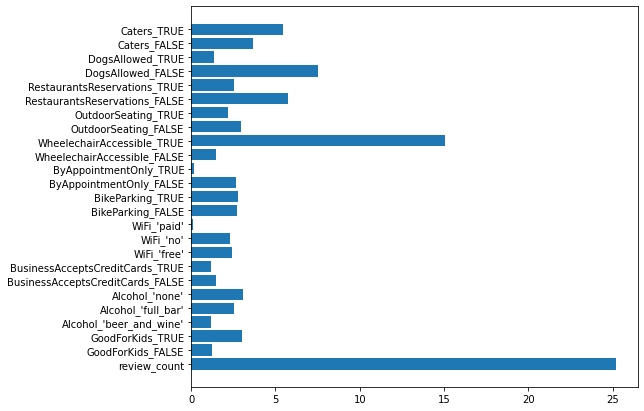

In [28]:
plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

From the bar chart shown above, we can figure it out how to improve the ratings.  
We may firstly ask the customers to leave more reviews on Yelp as it contribute most on the bar chart above, standing for 25%. Besides review, three tips to truly improve the service is to include WheelchairAccessible, DogsAllowed and Caters. These three features contribute a lot to the higher ratings in Yelp.  
Tips:   
1) Make your wheelchair easy accessible for the customer  
2) Try to make dogs allowed in the business  
3) Try to provide catering measures. 
